In [3]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
print(np.shape(boston.data))

(506, 13)


In [6]:
from sklearn.cross_validation import train_test_split
[x_train,x_test,y_train,y_test] = train_test_split(boston.data,boston.target,random_state=0)

In [9]:
print(np.shape(y_train))
print(np.shape(y_test))

(379,)
(127,)


In [11]:
from sklearn.linear_model import ElasticNet

In [13]:
model1 = ElasticNet().fit(x_train,y_train)

In [43]:
# Part 1

<Figure size 432x288 with 0 Axes>

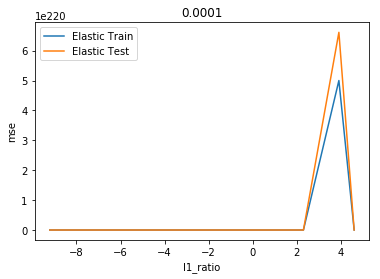

/home/meenu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


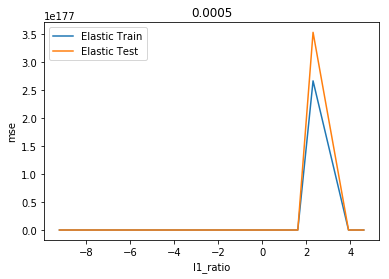

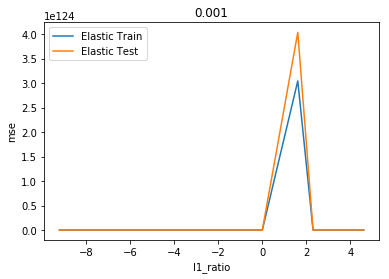

<Figure size 432x288 with 0 Axes>

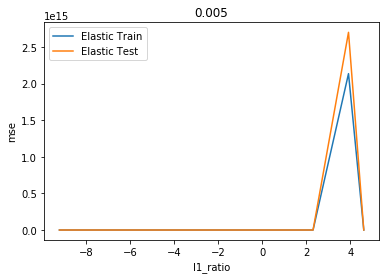

<Figure size 432x288 with 0 Axes>

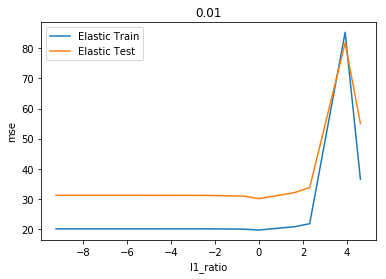

<Figure size 432x288 with 0 Axes>

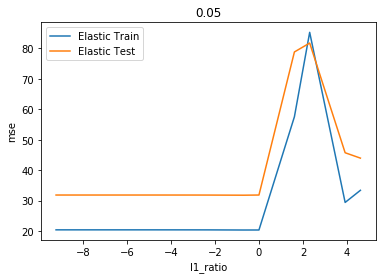

<Figure size 432x288 with 0 Axes>

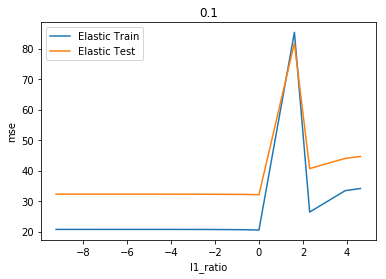

<Figure size 432x288 with 0 Axes>

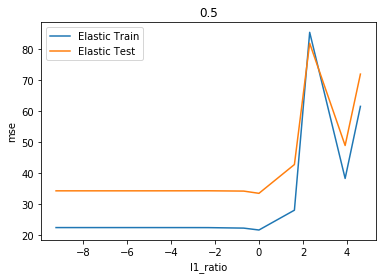

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

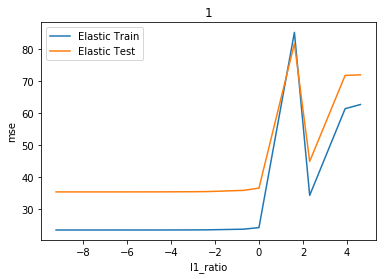

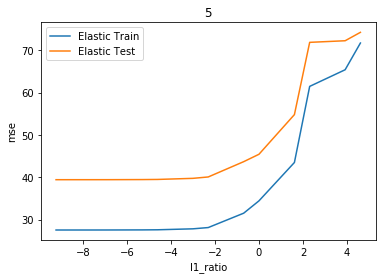

<Figure size 432x288 with 0 Axes>

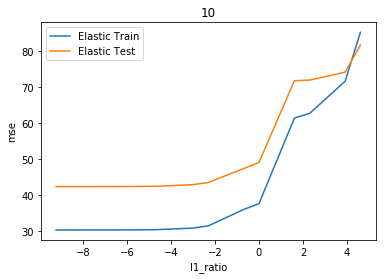

<Figure size 432x288 with 0 Axes>

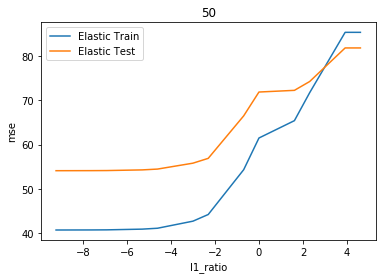

<Figure size 432x288 with 0 Axes>

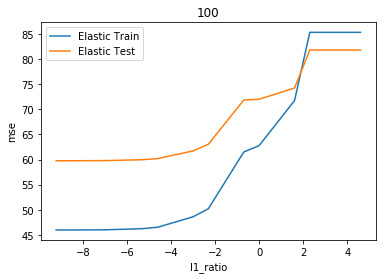

<Figure size 432x288 with 0 Axes>

In [26]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fixing alpha and swept across l1_ratio
alphas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratios = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
fig=0
for alpha in alphas :
    mse_elastic_train = []
    mse_elastic_test = []
    for l1_ratio in l1_ratios :
        model1 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model1.fit(x_train,y_train)
        y_train_predict = model1.predict(x_train)
        y_test_predict = model1.predict(x_test)
        mse_elastic_train.append(mean_squared_error(y_train,y_train_predict))
        mse_elastic_test.append(mean_squared_error(y_test,y_test_predict))
        
    plt.plot(np.log(l1_ratios),mse_elastic_train,label='Elastic Train')
    plt.plot(np.log(l1_ratios),mse_elastic_test,label='Elastic Test')
    plt.title(alpha)
    plt.xlabel('l1_ratio')
    plt.ylabel('mse')
    plt.legend()
    plt.figure(fig)
    fig+=1
    plt.show()
    

In [ ]:
# Interpretation
# For higher values of alpha (>=5), the training error and test error monotonically increase with l1 ratio
# For lower alpha values, both errors are 0 when l1 ratio is small indicating that there is overfitting

<Figure size 432x288 with 0 Axes>

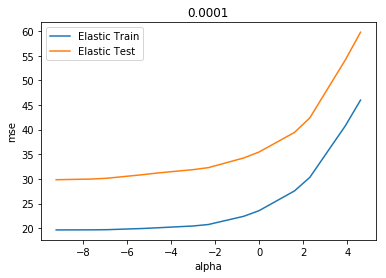

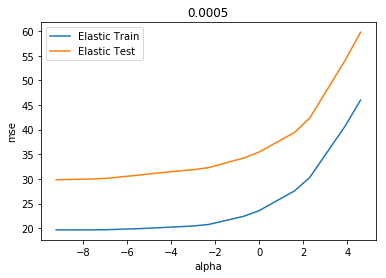

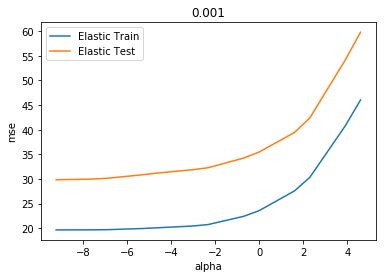

<Figure size 432x288 with 0 Axes>

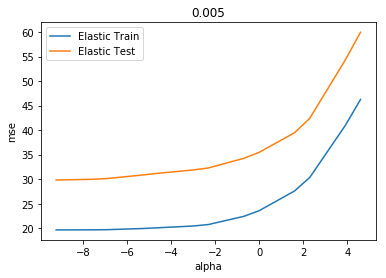

<Figure size 432x288 with 0 Axes>

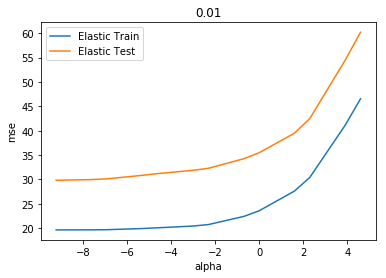

<Figure size 432x288 with 0 Axes>

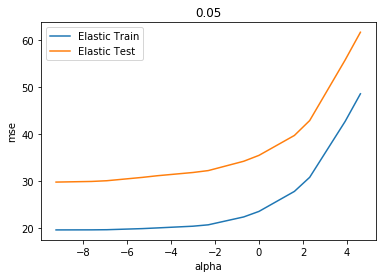

<Figure size 432x288 with 0 Axes>

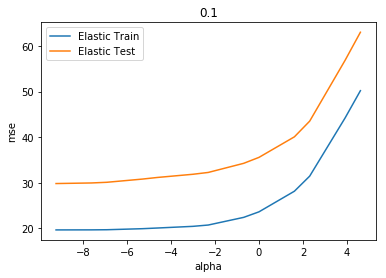

<Figure size 432x288 with 0 Axes>

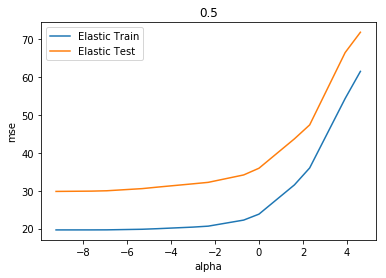

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

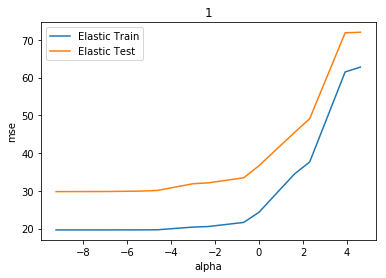

/home/meenu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


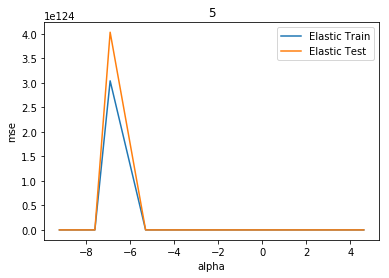

<Figure size 432x288 with 0 Axes>

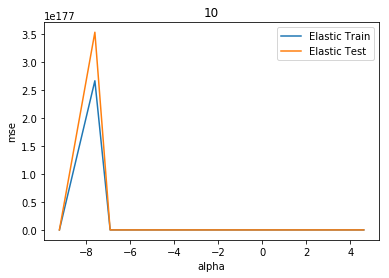

<Figure size 432x288 with 0 Axes>

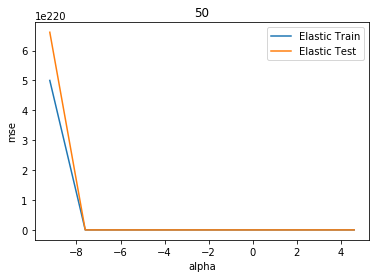

<Figure size 432x288 with 0 Axes>

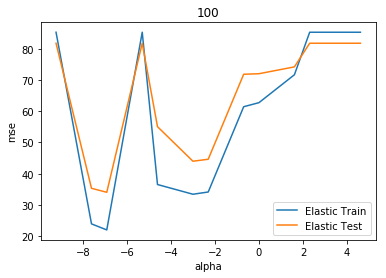

<Figure size 432x288 with 0 Axes>

In [39]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fixing l1_ratio and swept across alphas
alphas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratios = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
fig=0
for l1_ratio in l1_ratios :
    mse_elastic_train = []
    mse_elastic_test = []
    for alpha in alphas :
        model1 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model1.fit(x_train,y_train)
        y_train_predict = model1.predict(x_train)
        y_test_predict = model1.predict(x_test)
        mse_elastic_train.append(mean_squared_error(y_train,y_train_predict))
        mse_elastic_test.append(mean_squared_error(y_test,y_test_predict))
        
    plt.plot(np.log(alphas),mse_elastic_train,label='Elastic Train')
    plt.plot(np.log(alphas),mse_elastic_test,label='Elastic Test')
    plt.title(l1_ratio)
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.legend()
    plt.figure(fig)
    fig+=1
    plt.show()
    

In [34]:
# Interpretation
# Both errors increase with alpha for low l1_ratios and overfitting for high l1_ratio and high alpha values

In [42]:
# Part 2

<Figure size 432x288 with 0 Axes>

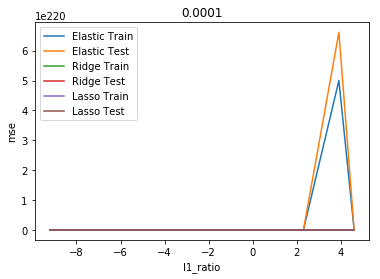

/home/meenu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

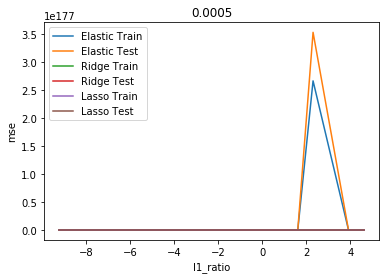

<Figure size 432x288 with 0 Axes>

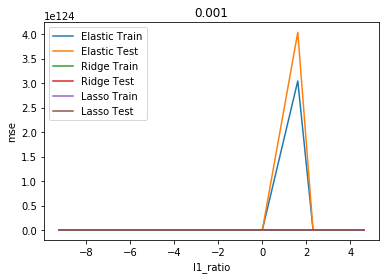

<Figure size 432x288 with 0 Axes>

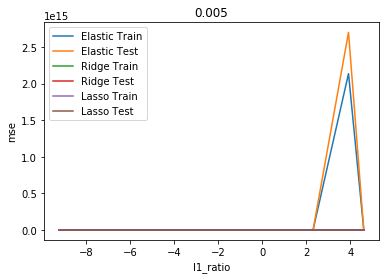

<Figure size 432x288 with 0 Axes>

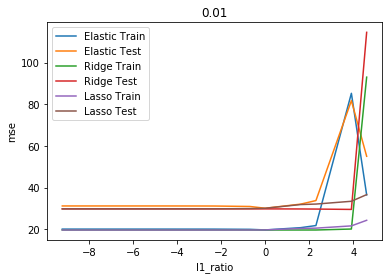

<Figure size 432x288 with 0 Axes>

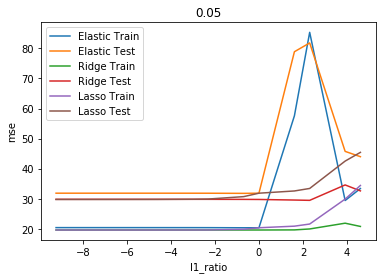

<Figure size 432x288 with 0 Axes>

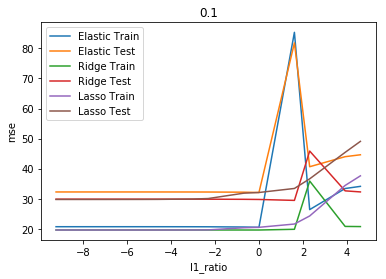

<Figure size 432x288 with 0 Axes>

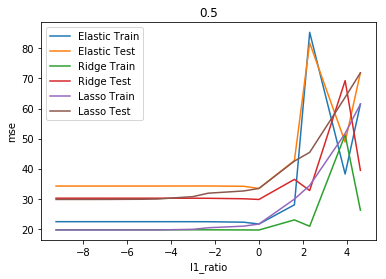

<Figure size 432x288 with 0 Axes>

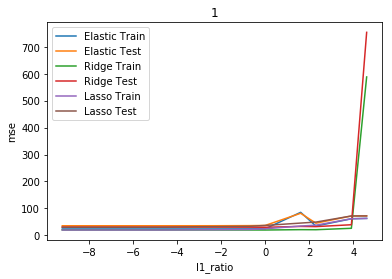

<Figure size 432x288 with 0 Axes>

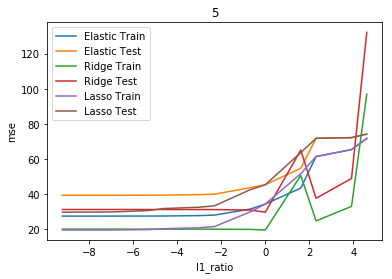

<Figure size 432x288 with 0 Axes>

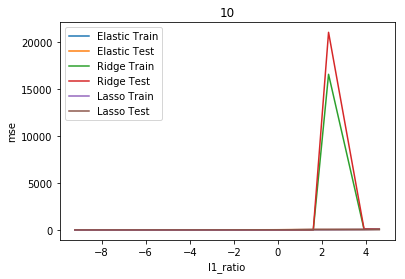

<Figure size 432x288 with 0 Axes>

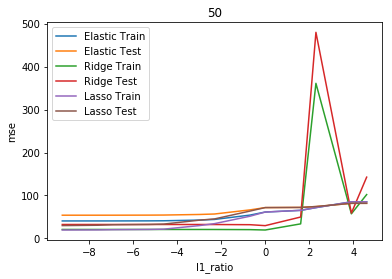

<Figure size 432x288 with 0 Axes>

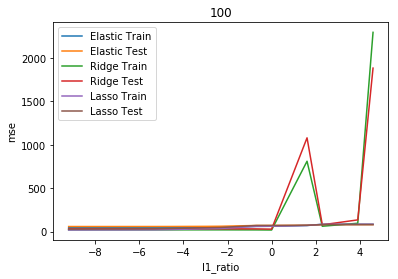

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Fixing alpha and swee
alphas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratios = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]


fig = 0
for alpha in alphas :
    mse_elastic_train = []
    mse_elastic_test = []
    mse_ridge_train = []
    mse_ridge_test = []
    mse_lasso_train = []
    mse_lasso_test = []
    for l1_ratio in l1_ratios :
        model1 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model1.fit(x_train,y_train)
        model2 = Ridge(alpha=(1-l1_ratio)*alpha)
        model2.fit(x_train,y_train)
        model3 = Lasso(alpha=l1_ratio*alpha)
        model3.fit(x_train,y_train)

        y1_train_predict = model1.predict(x_train)
        y1_test_predict = model1.predict(x_test)
        y2_train_predict = model2.predict(x_train)
        y2_test_predict = model2.predict(x_test)
        y3_train_predict = model3.predict(x_train)
        y3_test_predict = model3.predict(x_test)

        mse_elastic_train.append(mean_squared_error(y_train,y1_train_predict))
        mse_elastic_test.append(mean_squared_error(y_test,y1_test_predict))
        mse_ridge_train.append(mean_squared_error(y_train,y2_train_predict))
        mse_ridge_test.append(mean_squared_error(y_test,y2_test_predict))
        mse_lasso_train.append(mean_squared_error(y_train,y3_train_predict))
        mse_lasso_test.append(mean_squared_error(y_test,y3_test_predict))

    plt.plot(np.log(l1_ratios),mse_elastic_train,label='Elastic Train')
    plt.plot(np.log(l1_ratios),mse_elastic_test,label='Elastic Test')
    plt.plot(np.log(l1_ratios),mse_ridge_train,label='Ridge Train')
    plt.plot(np.log(l1_ratios),mse_ridge_test,label='Ridge Test')
    plt.plot(np.log(l1_ratios),mse_lasso_train,label='Lasso Train')
    plt.plot(np.log(l1_ratios),mse_lasso_test,label='Lasso Test')

    plt.title(alpha)
    plt.xlabel('l1_ratio')
    plt.ylabel('mse')
    plt.legend()
    plt.figure(fig)
    plt.show()

<Figure size 432x288 with 0 Axes>

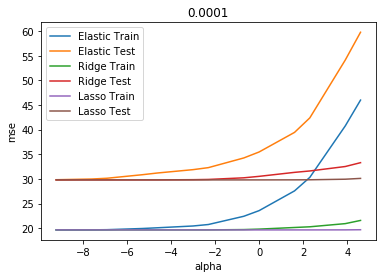

<Figure size 432x288 with 0 Axes>

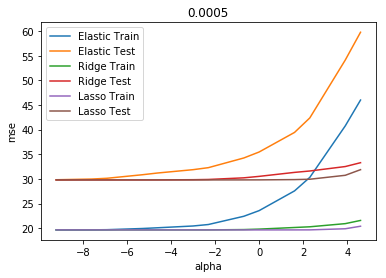

<Figure size 432x288 with 0 Axes>

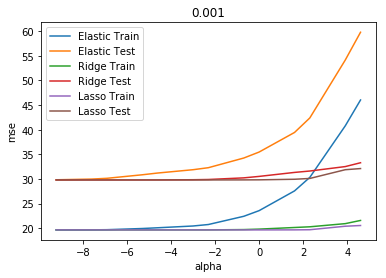

<Figure size 432x288 with 0 Axes>

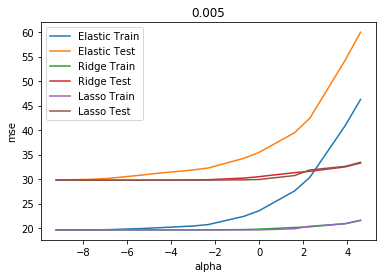

<Figure size 432x288 with 0 Axes>

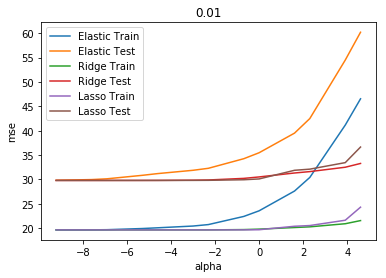

<Figure size 432x288 with 0 Axes>

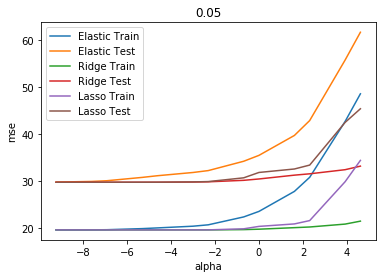

<Figure size 432x288 with 0 Axes>

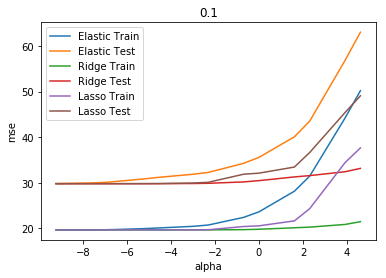

<Figure size 432x288 with 0 Axes>

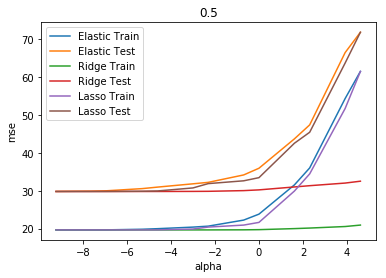

<Figure size 432x288 with 0 Axes>

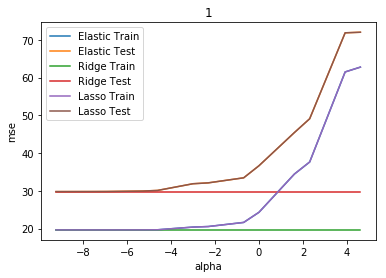

/home/meenu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

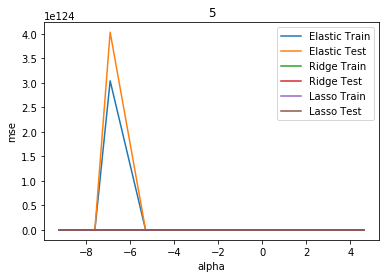

<Figure size 432x288 with 0 Axes>

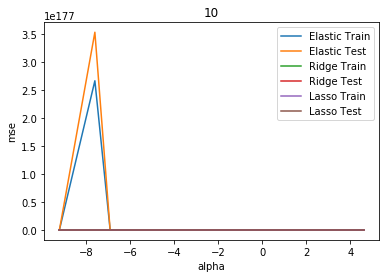

<Figure size 432x288 with 0 Axes>

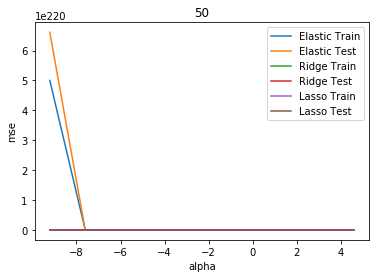

<Figure size 432x288 with 0 Axes>

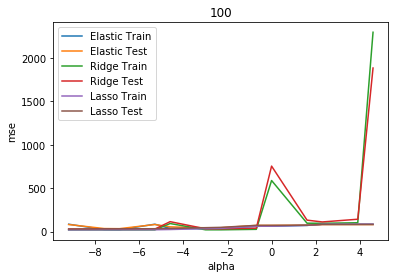

In [41]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Fixing l1_ratio and swept across alphas
alphas = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]
l1_ratios = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100]


fig = 0
for l1_ratio in l1_ratios :
    mse_elastic_train = []
    mse_elastic_test = []
    mse_ridge_train = []
    mse_ridge_test = []
    mse_lasso_train = []
    mse_lasso_test = []
    for alpha in alphas :
        model1 = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model1.fit(x_train,y_train)
        model2 = Ridge(alpha=(1-l1_ratio)*alpha)
        model2.fit(x_train,y_train)
        model3 = Lasso(alpha=l1_ratio*alpha)
        model3.fit(x_train,y_train)

        y1_train_predict = model1.predict(x_train)
        y1_test_predict = model1.predict(x_test)
        y2_train_predict = model2.predict(x_train)
        y2_test_predict = model2.predict(x_test)
        y3_train_predict = model3.predict(x_train)
        y3_test_predict = model3.predict(x_test)

        mse_elastic_train.append(mean_squared_error(y_train,y1_train_predict))
        mse_elastic_test.append(mean_squared_error(y_test,y1_test_predict))
        mse_ridge_train.append(mean_squared_error(y_train,y2_train_predict))
        mse_ridge_test.append(mean_squared_error(y_test,y2_test_predict))
        mse_lasso_train.append(mean_squared_error(y_train,y3_train_predict))
        mse_lasso_test.append(mean_squared_error(y_test,y3_test_predict))

    plt.plot(np.log(alphas),mse_elastic_train,label='Elastic Train')
    plt.plot(np.log(alphas),mse_elastic_test,label='Elastic Test')
    plt.plot(np.log(alphas),mse_ridge_train,label='Ridge Train')
    plt.plot(np.log(alphas),mse_ridge_test,label='Ridge Test')
    plt.plot(np.log(alphas),mse_lasso_train,label='Lasso Train')
    plt.plot(np.log(alphas),mse_lasso_test,label='Lasso Test')

    plt.title(l1_ratio)
    plt.xlabel('alpha')
    plt.ylabel('mse')
    plt.legend()
    plt.figure(fig)
    plt.show()

In [ ]:
# Overfitting at high alpha and high l1_ratio values. For l1_ratios less than 0.5, all errors increase as 
# alpha increase. For l1_ratios < 0.01, lasso performs better on test set than ridge, while the reverse is
# true for higher l1_ratios